In [4]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import  classification_report
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [2]:
file_path = '/content/drive/MyDrive/scdd/scdd/archive (2)/data/train'

In [3]:
name_class = os.listdir(file_path)
name_class

['benign', 'malignant']

In [4]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [5]:
filepaths

['/content/drive/MyDrive/scdd/scdd/archive (2)/data/train/benign/1664.jpg',
 '/content/drive/MyDrive/scdd/scdd/archive (2)/data/train/benign/1507.jpg',
 '/content/drive/MyDrive/scdd/scdd/archive (2)/data/train/benign/1619.jpg',
 '/content/drive/MyDrive/scdd/scdd/archive (2)/data/train/benign/149.jpg',
 '/content/drive/MyDrive/scdd/scdd/archive (2)/data/train/benign/1603.jpg',
 '/content/drive/MyDrive/scdd/scdd/archive (2)/data/train/benign/1684.jpg',
 '/content/drive/MyDrive/scdd/scdd/archive (2)/data/train/benign/1449.jpg',
 '/content/drive/MyDrive/scdd/scdd/archive (2)/data/train/benign/1520.jpg',
 '/content/drive/MyDrive/scdd/scdd/archive (2)/data/train/benign/1772.jpg',
 '/content/drive/MyDrive/scdd/scdd/archive (2)/data/train/benign/166.jpg',
 '/content/drive/MyDrive/scdd/scdd/archive (2)/data/train/benign/1524.jpg',
 '/content/drive/MyDrive/scdd/scdd/archive (2)/data/train/benign/150.jpg',
 '/content/drive/MyDrive/scdd/scdd/archive (2)/data/train/benign/174.jpg',
 '/content/drive

In [6]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',
 'benign',

In [7]:
filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)

,Filepath,Label
0,/content/drive/MyDrive/scdd/scdd/archive (2)/d...,benign
1,/content/drive/MyDrive/scdd/scdd/archive (2)/d...,malignant
2,/content/drive/MyDrive/scdd/scdd/archive (2)/d...,benign
3,/content/drive/MyDrive/scdd/scdd/archive (2)/d...,benign
4,/content/drive/MyDrive/scdd/scdd/archive (2)/d...,benign


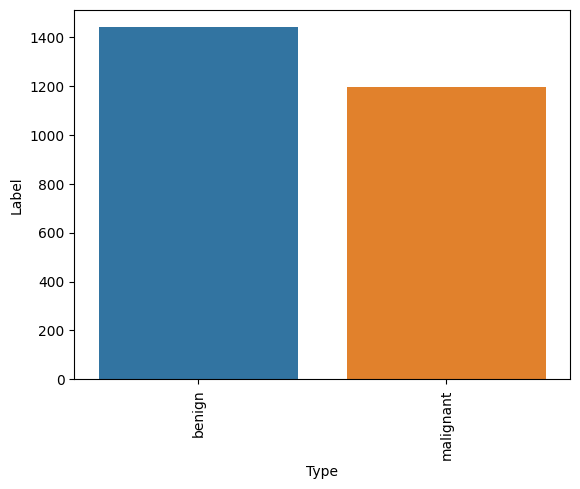

In [8]:
#balancing
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [9]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

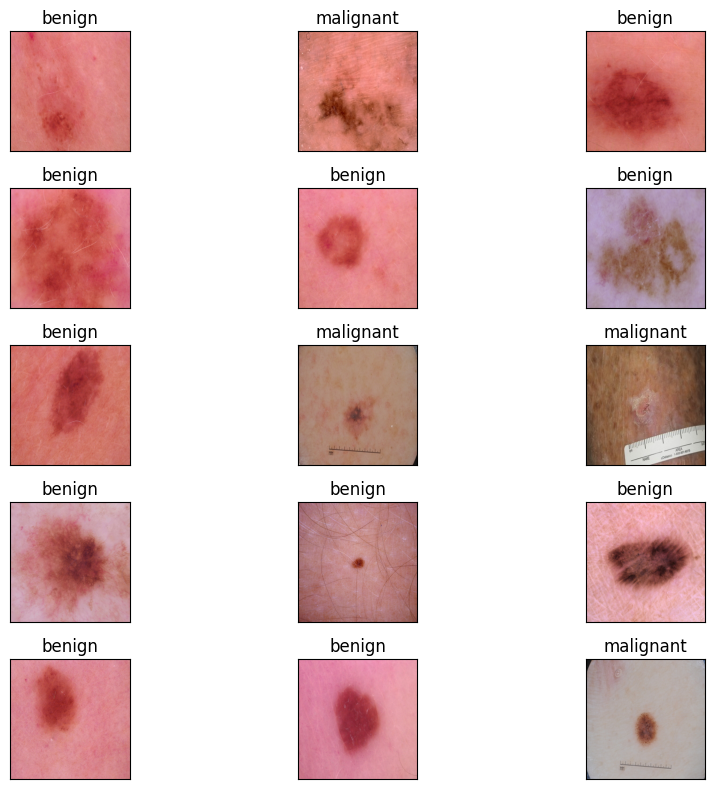

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [11]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [12]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 1977 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.
Found 660 validated image filenames belonging to 2 classes.


In [13]:
pretrained_model = ResNet50(
    input_shape=(100,100, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [14]:
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [15]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [17]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=100
)

Epoch 1/100
62/62 [==============================] - 551s 9s/step - loss: 0.4246 - accuracy: 0.8118 - val_loss: 0.4807 - val_accuracy: 0.7939
Epoch 2/100
62/62 [==============================] - 9s 151ms/step - loss: 0.2870 - accuracy: 0.8690 - val_loss: 0.4152 - val_accuracy: 0.8182
Epoch 3/100
62/62 [==============================] - 9s 150ms/step - loss: 0.2441 - accuracy: 0.8907 - val_loss: 0.3935 - val_accuracy: 0.8409
Epoch 4/100
62/62 [==============================] - 9s 140ms/step - loss: 0.1976 - accuracy: 0.9135 - val_loss: 0.4277 - val_accuracy: 0.8000
Epoch 5/100
62/62 [==============================] - 9s 141ms/step - loss: 0.1642 - accuracy: 0.9267 - val_loss: 0.3699 - val_accuracy: 0.8273
Epoch 6/100
62/62 [==============================] - 10s 154ms/step - loss: 0.1358 - accuracy: 0.9423 - val_loss: 0.4547 - val_accuracy: 0.8258
Epoch 7/100
62/62 [==============================] - 9s 151ms/step - loss: 0.1023 - accuracy: 0.9605 - val_loss: 0.4244 - val_accuracy: 0.8273

In [18]:
model.save("fmodel_resnet50.h5")

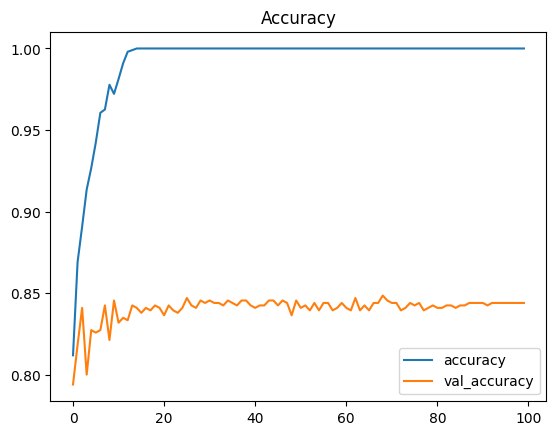

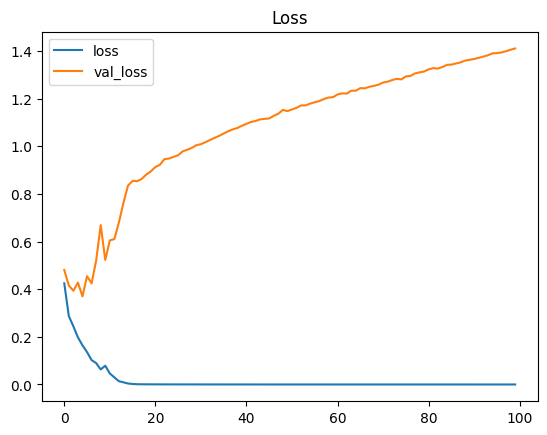

In [19]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [21]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

    Test Loss: 1.41029
Test Accuracy: 84.39%


In [22]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

21/21 [==============================] - 5s 99ms/step


In [23]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      benign       0.84      0.89      0.87       372
   malignant       0.84      0.79      0.82       288

    accuracy                           0.84       660
   macro avg       0.84      0.84      0.84       660
weighted avg       0.84      0.84      0.84       660



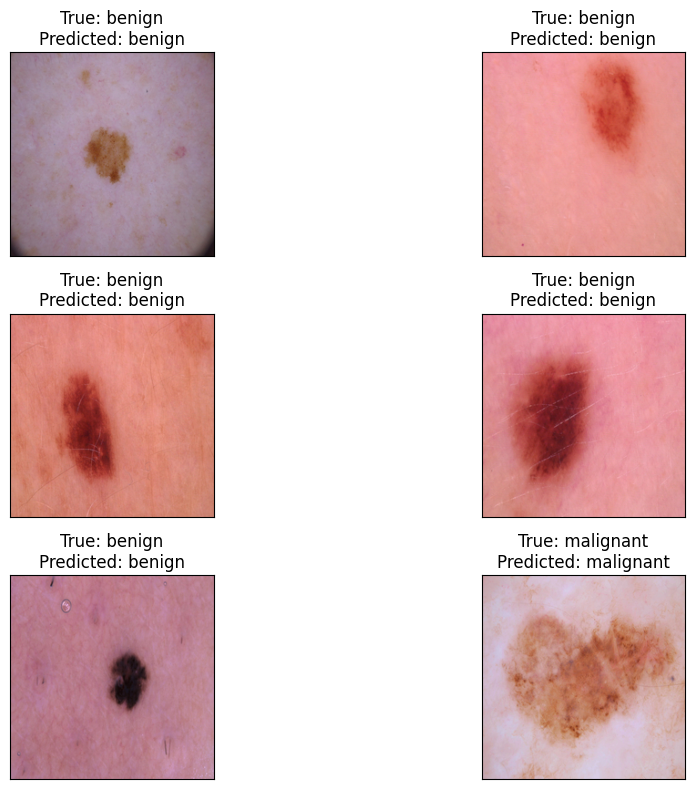

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [25]:
from tensorflow.keras.models import load_model
loaded_model_imageNet = load_model("fmodel_resnet50.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [26]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.6/188.6 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 82.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 35.2 MB/s eta 0:00:00
  Attempting uninstall: tzlocal
    Found existing installation: tzlocal 5.0.1
    Uninstalling tzlocal-5.0.1:
      Successfully uninstalled tzlocal-5.0.1


In [28]:
%%writefile app.py
import streamlit as st
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import load_model
import tempfile

# Load the pre-trained model
model_path = "/content/fmodel_resnet50.h5"
loaded_model_imageNet = load_model(model_path)

# Define the class labels
class_labels = ['benign', 'Malignant']

# Create a Streamlit app
def main():
    st.title("Skin Cancer Classification App")
    st.sidebar.title("Upload Image")

    uploaded_image = st.sidebar.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])

    if uploaded_image is not None:
        # Display the uploaded image
        st.sidebar.image(uploaded_image, caption="Uploaded Image", use_column_width=True)

        # Preprocess and predict the image
        if st.sidebar.button("Predict"):
            image = preprocess_uploaded_image(uploaded_image)
            if image is not None:
                prediction = predict_skin_cancer(image)
                st.write(f"Prediction: {class_labels[prediction]}")

# Preprocess the uploaded image
def preprocess_uploaded_image(uploaded_image):
    try:
        # Create a temporary directory
        temp_dir = tempfile.TemporaryDirectory()
        temp_file_path = os.path.join(temp_dir.name, "uploaded_image.jpg")

        # Save the uploaded image to the temporary directory
        with open(temp_file_path, "wb") as temp_file:
            temp_file.write(uploaded_image.read())

        # Read the uploaded image using the absolute file path
        img = cv2.imread(temp_file_path)

        if img is None:
            st.error("Error: Unable to read the uploaded image. Please make sure it's a valid image file.")
            return None

        # Resize the image to (100, 100)
        img = cv2.resize(img, (100, 100))

        # Expand dimensions to match the model input shape
        img = np.expand_dims(img, axis=0)

        # Preprocess the image
        img = preprocess_input(img)

        return img
    except Exception as e:
        st.error(f"Error: {e}")
        return None

# Predict the skin cancer type
def predict_skin_cancer(img):
    result = loaded_model_imageNet.predict(img)
    return np.argmax(result)

if __name__ == "__main__":
    main()


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.147.80.161:8501

npx: installed 22 in 4.132s
your url is: https://little-doors-end.loca.lt
2023-09-02 09:10:02.216283: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-02 09:10:03.148092: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-09-02 09:10:04.614697: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.c

In [1]:
!curl ipv4.icanhazip.com

34.147.80.161
